In [177]:
import numpy as np
import copy
from tabulate import tabulate
import matplotlib.pyplot as plt

In [178]:
def read_data(filename):
    with open(filename, 'r') as f:
        matrix = []
        for line in f:
            row = [float('inf') if x == 'nan' else int(x) for x in line.split()]
            matrix.append(row)

    return np.array(matrix)

In [179]:
def print_matrix(matrix, row_numbers, column_numbers):
    # Підготовка даних для табличного відображення
    num_rows, num_cols = matrix.shape
    
    # Додаємо нумерацію рядків і стовпців
    table = []
    
    for i in range(num_rows):
        # Додаємо нумерацію рядка з row_numbers і значення з матриці
        row = [row_numbers[i][0]] + list(matrix[i])
        table.append(row)
    
    headers = ["Місто"] + list(column_numbers)  # Номери стовпців з column_numbers

    # Виведення таблиці
    print(tabulate(table, headers=headers, tablefmt="grid", floatfmt=".0f"))

In [180]:
def find_alpha_i(matrix):
    min_elements = []

    for row in matrix:
        # Фільтруємо значення нескінченності та знаходимо мінімальне значення
        min_val = min([val for val in row if val != float('inf')])
        min_elements.append([int(min_val)])  # Додаємо як окремий елемент для стовпця
        
    return min_elements

In [181]:
def print_matrix_with_alpha(matrix, alpha_i, row_numbers, column_numbers):
    # Підготовка даних для табличного відображення з додатковим стовпцем мінімальних значень
    num_rows, num_cols = matrix.shape
    
    table = []
    
    # Додаємо кожен рядок з відповідною нумерацією і значеннями з матриці
    for i in range(num_rows):
        row = [row_numbers[i][0]] + list(matrix[i]) + [alpha_i[i][0]]  # Номери рядків та alpha_i
        table.append(row)
    
    headers = ["Місто"] + list(column_numbers) + ["α_i"]  # Заголовки з номерами стовпців та α_i

    # Виведення таблиці
    print("\nМатриця відстаней з α_i:")
    print(tabulate(table, headers=headers, tablefmt="grid", floatfmt=".0f"))

In [182]:
def find_beta_j(matrix):
    min_elements = []
    num_columns = matrix.shape[1]

    for col in range(num_columns):
        # Фільтруємо значення нескінченності та знаходимо мінімальне значення в кожному стовпці
        min_val = min([matrix[row][col] for row in range(matrix.shape[0]) if matrix[row][col] != float('inf')])
        min_elements.append(int(min_val))  # Додаємо мінімальне значення до списку

    return min_elements  # Повертаємо список мінімальних значень як один рядок

In [183]:
def print_matrix_with_beta(matrix, beta_j, row_numbers, column_numbers):
    # Підготовка даних для табличного відображення
    num_rows, num_cols = matrix.shape
    
    table = []
    
    # Додаємо кожен рядок з відповідною нумерацією і значеннями з матриці
    for i in range(num_rows):
        row = [row_numbers[i][0]] + list(matrix[i])  # Номери рядків
        table.append(row)
    
    # Заголовки з номерами стовпців
    headers = ["Місто"] + list(column_numbers)
    
    # Додаємо додатковий рядок для мінімальних значень по стовпцях (β_j)
    beta_j_row = ["β_j"] + beta_j  # Мінімальні значення для кожного стовпця
    
    # Виведення таблиці
    print("\nМатриця відстаней з мінімальними значеннями по стовпцях:")
    print(tabulate(table + [beta_j_row], headers=headers, tablefmt="grid", floatfmt=".0f"))

In [184]:
def find_phi_r(alpha_i, beta_j):
    return sum(alpha[0] for alpha in alpha_i) + sum (beta_j)

In [185]:
def calculate_weights_of_zeros(matrix):
    # Створюємо копію матриці для результату
    result = np.full(matrix.shape, np.nan)
    
    # Проходимо по всіх елементах матриці
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] == 0:
                # Знаходимо мінімальне значення по рядку (окрім поточної комірки)
                row_min = np.min(np.delete(matrix[i], j))  # Видаляємо поточний елемент
                # Знаходимо мінімальне значення по стовпцю (окрім поточної комірки)
                col_min = np.min(np.delete(matrix[:, j], i))  # Видаляємо поточний елемент
                # Обчислюємо вагу для поточної комірки
                result[i][j] = row_min + col_min

    return result

In [186]:
def print_matrix_with_weights(matrix, row_numbers, column_numbers, weights):
    # Підготовка даних для табличного відображення
    num_rows, num_cols = matrix.shape
    
    # Додаємо нумерацію рядків і стовпців
    table = []
    
    for i in range(num_rows):
        row = []
        for j in range(num_cols):
            if matrix[i, j] == 0:
                # Якщо значення в матриці 0, додаємо його вагу в дужках
                row.append(f"0  ({int(weights[i, j])})")
            else:
                # Якщо значення не 0 і не inf, виводимо як ціле, інакше - inf
                if matrix[i, j] == float('inf'):
                    row.append("inf")
                else:
                    row.append(f"{int(matrix[i, j])}")
        # Додаємо нумерацію рядка з row_numbers і значення з матриці
        table.append([row_numbers[i][0]] + row)
    
    # Додаємо заголовки для стовпців
    headers = ["Місто"] + [str(col) for col in column_numbers]  # Номери стовпців з column_numbers

    # Виведення таблиці
    print(tabulate(table, headers=headers, tablefmt="grid", floatfmt=".0f"))

In [187]:
def remove_row_and_column(matrix, row_numbers, column_numbers, coordinates):
    row_coord = coordinates[0]
    col_coord = coordinates[1]
    # print(col_coord)
    
    # Знаходимо індекс рядка, де знаходиться row_coord
    row_idx = np.where(row_numbers == row_coord)[0][0]
    
    # Знаходимо індекс стовпця, де знаходиться col_coord
    col_idx = np.where(column_numbers == col_coord)[0][0]
    
    # Видаляємо рядок і стовпець з основної матриці
    matrix = np.delete(matrix, row_idx, axis=0)  # Видаляємо рядок
    matrix = np.delete(matrix, col_idx, axis=1)  # Видаляємо стовпець
    
    # Видаляємо рядок з матриці нумерації рядків
    row_numbers = np.delete(row_numbers, row_idx, axis=0)
    
    # Видаляємо стовпець з матриці нумерації стовпців
    column_numbers = np.delete(column_numbers, col_idx, axis=0)
    
    return matrix, row_numbers, column_numbers


In [188]:
def find_max_weight_coords(matrix, row_numbers, column_numbers):
    # Заміняємо NaN на -inf, щоб вони не впливали на пошук найбільшого елемента
    matrix_no_nan = np.nan_to_num(matrix, nan=-np.inf)
    
    # Знаходимо індекс найбільшого елемента
    max_zero_weight = int(np.max(matrix_no_nan))
    max_index = np.argmax(matrix_no_nan)
        
    # Перетворюємо цей індекс у двовимірні координати (рядок, стовпець)
    row, col = np.unravel_index(max_index, matrix.shape)
    
    row_number = row_numbers[row][0]  # Оскільки row_numbers - це 2D масив
    col_number = column_numbers[col]  # Оскільки column_numbers - це 1D масив
    
    return max_zero_weight, (row_number, col_number)

In [189]:
def find_cycle_candidates(row_numbers, column_numbers, path):
    row_numbers = row_numbers.flatten()  # Перетворюємо row_numbers на одномірний масив
    cycle_candidates = []  # Список для збереження кандидатів на цикл
    
    for i in path:
        cycle_candidates.append((i[1], i[0]))
    # print()

    # Копія поточного шляху
    for row in row_numbers:
        for col in column_numbers:
            
            # Пропускаємо елементи на головній діагоналі
            if row == col:
                continue
                
            # print("\n")
            # print(row, col)

#             # Копіюємо поточний шлях і додаємо нову пару
            new_path = path + [(row, col)]
            # print(f"new_path = {new_path}")

            # Перевіряємо, чи утворюється цикл або підцикл
            if find_cycle_or_subcycle(new_path):
                cycle_candidates.append((row, col))
                
    return cycle_candidates

def find_cycle_or_subcycle(path):
    start = path[-1][0]
    current = path[-1][1]
    
    while True:
        found_connection = False

        for i in range(len(path) - 1):
            # print(f'\ti = {i}')
            if path[i][0] == current:
                # print(f'\t{path[i]}')

                current = path[i][1]
                found_connection = True
                break
        
        if not found_connection:
            # print("Цикл або підцикл не знайдено.")
            return False
        
        if current == start:
            # print("Знайдений цикл:", path)
            return True
        
# # Приклад використання
# row_numbers = np.array([[2], [3], [4], [5]])  # Масив рядків
# column_numbers = np.array([1, 2, 3, 5])  # Масив стовпців
# path = [(1, 4)]  # Поточний шлях

# cycle_candidates = find_cycle_candidates(row_numbers, column_numbers, path)
# print(cycle_candidates)




In [190]:
def add_inf(matrix, row_numbers, column_numbers, cycle_candidates):
    # Перетворимо масиви на списки для зручності
    row_numbers = row_numbers.flatten().tolist()  # Перетворюємо на список
    column_numbers = column_numbers.tolist()  # Перетворюємо на список
    
    # Проходимо по кожному кандидату циклу
    for candidate in cycle_candidates:
        row_index, col_index = candidate
        if row_index in row_numbers and col_index in column_numbers:
            # Знаходимо індекс відповідних рядків і стовпців
            row_pos = row_numbers.index(row_index)
            col_pos = column_numbers.index(col_index)
            # Заміна елемента на float('inf')
            matrix[row_pos, col_pos] = float('inf')
    
    return matrix

In [191]:
def get_valid_coordinates_and_sum(matrix, row_numbers, column_numbers):
    # Перетворимо масиви на списки для зручності
    row_numbers = row_numbers.flatten().tolist()
    column_numbers = column_numbers.tolist()
    
    valid_coordinates = []
    total_sum = 0
    
    # Перебираємо координати та перевіряємо значення в матриці
    for i, row_index in enumerate(row_numbers):
        for j, col_index in enumerate(column_numbers):
            # Якщо елемент не є inf, додаємо його координати та значення до результатів
            if matrix[i, j] != float('inf'):
                valid_coordinates.append((row_index, col_index))
                total_sum += matrix[i, j]
    
    return valid_coordinates, total_sum

In [192]:
def reorder_pairs(pairs):
    # Копіюємо список пар, щоб не змінювати оригінальний список
    ordered_pairs = [pairs.pop(0)]  # Починаємо з першої пари

    while pairs:
        # Отримуємо кінцеве значення останньої пари в ordered_pairs
        last_end = ordered_pairs[-1][1]
        
        # Шукаємо пару, де перший елемент дорівнює кінцю попередньої пари
        for pair in pairs:
            if pair[0] == last_end:
                ordered_pairs.append(pair)
                pairs.remove(pair)
                break
    
    return ordered_pairs

In [193]:
def format_as_transitions(ordered_pairs):
    # Формуємо рядок у вигляді переходів
    transitions = " -> ".join(str(pair[0]) for pair in ordered_pairs) + " -> " + str(ordered_pairs[-1][1])
    return transitions

In [194]:
def plot_path_with_distances(matrix, ordered_pairs):
    # Ініціалізуємо графік
    plt.figure(figsize=(8, 8))

    # Кількість точок
    num_points = len(set([pair[0] for pair in ordered_pairs] + [pair[1] for pair in ordered_pairs]))

    # Параметри кола: центр і радіус
    center_x, center_y = 0.5, 0.5  # Центр кола
    radius = 0.4  # Радіус кола

    # Генеруємо кути для точок на колі
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

    # Генеруємо координати точок по колу
    points = {}
    for i, angle in enumerate(angles):
        point = i + 1  # Точка i
        x = center_x + radius * np.cos(angle)
        y = center_y + radius * np.sin(angle)
        points[point] = (x, y)

    # Малюємо точки
    for point, (x, y) in points.items():
        plt.scatter(x, y, s=50, color='red')
        plt.text(x+0.01, y+0.01, str(point), fontsize=12, ha='right', va='bottom')

    # Малюємо стрілочки між точками
    for i in range(len(ordered_pairs)):
        start_point = ordered_pairs[i][0]
        end_point = ordered_pairs[i][1]
        
        # Отримуємо координати для початкової та кінцевої точки
        start_x, start_y = points[start_point]
        end_x, end_y = points[end_point]
        
        # Генеруємо випадковий колір для кожної стрілочки
        color = np.random.rand(3,)  # Створюємо випадковий колір у форматі RGB

        # Коефіцієнт для зменшення довжини стрілки (щоб не накладалась на точку)
        arrow_length_factor = 0.05  # Зменшуємо довжину стрілочки

        # Рахуємо напрямок вектора від початкової до кінцевої точки
        dx = end_x - start_x
        dy = end_y - start_y
        length = np.sqrt(dx**2 + dy**2)  # Довжина вектора

        # Відсунути кінцеву точку стрілки в бік початкової точки, щоб уникнути накладення
        arrow_end_x = end_x - (dx / length) * arrow_length_factor
        arrow_end_y = end_y - (dy / length) * arrow_length_factor

        # Малюємо стрілочку з урахуванням нового кінця
        plt.arrow(start_x, start_y, arrow_end_x - start_x, arrow_end_y - start_y,
                  head_width=0.015, head_length=0.025, fc=color, ec=color, 
                  shape='full', lw=1)  # Витонченіші стрілочки

        # Отримуємо довжину шляху між точками з матриці
        row_index = start_point - 1  # Для матриці індекси зсуваються на 1
        col_index = end_point - 1
        path_length = matrix[row_index, col_index]
        
        # Додаємо текст (довжину шляху) біля стрілочки
        mid_x = (start_x + end_x) / 2
        mid_y = (start_y + end_y) / 2
        plt.text(mid_x+0.01, mid_y+0.01, f"{int(path_length)}", fontsize=10, color='#540773', ha='center', va='center')

    # Налаштовуємо осі графіка
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')  # Вимикаємо осі

    plt.show()




Вхідні дані:
+---------+-----+-----+-----+-----+-----+-----+-----+
|   Місто |   1 |   2 |   3 |   4 |   5 |   6 |   7 |
+=========+=====+=====+=====+=====+=====+=====+=====+
|       1 | inf |   8 |   7 |   3 |   9 |  12 |  10 |
+---------+-----+-----+-----+-----+-----+-----+-----+
|       2 |   5 | inf |   4 |   5 |   7 | 110 |   9 |
+---------+-----+-----+-----+-----+-----+-----+-----+
|       3 |   4 |   4 | inf |   9 |   2 |  11 |   2 |
+---------+-----+-----+-----+-----+-----+-----+-----+
|       4 |   1 |   7 |   4 | inf |   8 |  10 |   3 |
+---------+-----+-----+-----+-----+-----+-----+-----+
|       5 |   7 |   4 |   5 |   3 | inf |  23 |  23 |
+---------+-----+-----+-----+-----+-----+-----+-----+
|       6 |   5 |   5 |  10 |   4 |   5 | inf |  10 |
+---------+-----+-----+-----+-----+-----+-----+-----+
|       7 |   1 |   1 |   1 |   1 |   1 |   2 | inf |
+---------+-----+-----+-----+-----+-----+-----+-----+

Матриця відстаней з α_i:
+---------+-----+-----+-----+-----+-----

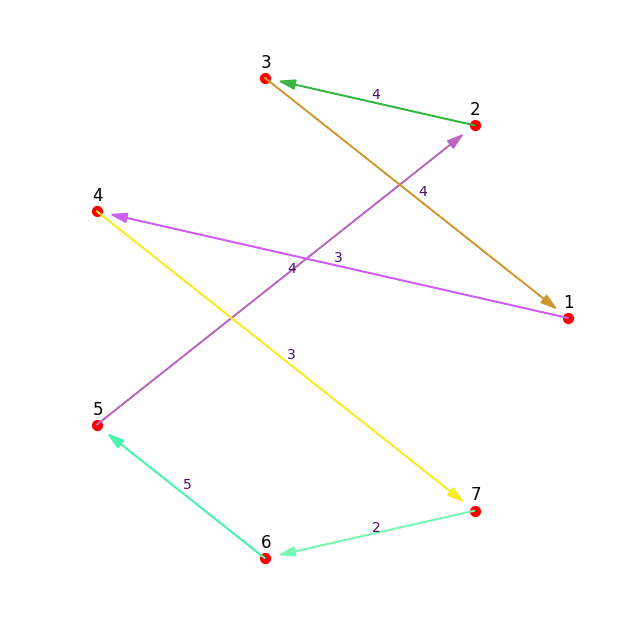

In [195]:
file_name = input("Введіть назву файлу з даними: ")
input_matrix = read_data(file_name)
print("\n\n")


row_numbers = np.arange(1, input_matrix.shape[0] + 1).reshape(-1, 1)
column_numbers = np.arange(1, input_matrix.shape[1] + 1)
print("Вхідні дані:")
print_matrix(input_matrix, row_numbers, column_numbers)


alpha_i = find_alpha_i(input_matrix)
print_matrix_with_alpha(input_matrix, alpha_i, row_numbers, column_numbers)
print('\nЗводимо матрицю по рядках:')
matrix = input_matrix - alpha_i
print_matrix(matrix, row_numbers, column_numbers)


beta_j = find_beta_j(matrix)
print_matrix_with_beta(matrix, beta_j, row_numbers, column_numbers)
print('\nЗводимо матрицю по стовпцях:')
matrix -= beta_j
print_matrix(matrix, row_numbers, column_numbers)


phi_r = find_phi_r(alpha_i, beta_j)
phi_yes = phi_r

print(f'\n\tphi_R = {phi_r}')
way = []
while len(matrix) > 2:

    print('\n\nШукаємо 0 з найбільшою вагою')
    weights = calculate_weights_of_zeros(matrix)
    print_matrix_with_weights(matrix, row_numbers, column_numbers, weights)

    # max_zero_weight, coordinates = find_max_weight_coords(weights)
    max_zero_weight, coordinates = find_max_weight_coords(weights, row_numbers, column_numbers)
    print(f"Найбільша вага нуля = {max_zero_weight}. Його координати ({coordinates[0]}, {coordinates[1]})")

    # Додаємо глибоку копію координат у список
    way.append(copy.deepcopy(coordinates))

    phi_no = phi_yes + max_zero_weight

    print("\nВилучаємо відповідні рядок і стовпець з матриці:")
    matrix, row_numbers, column_numbers = remove_row_and_column(matrix, row_numbers, column_numbers, coordinates)
    print_matrix(matrix, row_numbers, column_numbers)

    print("\nЗабираємо зациклення:")
    cycle_candidates = find_cycle_candidates(row_numbers, column_numbers, way)
    matrix = add_inf(matrix, row_numbers, column_numbers, cycle_candidates)    
    print_matrix(matrix, row_numbers, column_numbers)
    

    alpha_i = find_alpha_i(matrix)
    print_matrix_with_alpha(matrix, alpha_i, row_numbers, column_numbers)
    print('\nЗводимо матрицю по рядках:')
    matrix -= alpha_i
    print_matrix(matrix, row_numbers, column_numbers)

    beta_j = find_beta_j(matrix)
    print_matrix_with_beta(matrix, beta_j, row_numbers, column_numbers)
    print('\nЗводимо матрицю по стовпцях:')
    matrix -= beta_j
    print_matrix(matrix, row_numbers, column_numbers)

    phi_r = find_phi_r(alpha_i, beta_j)
    phi_yes += phi_r

    print(f"\nphi_no_{coordinates[0]}_{coordinates[1]} = {phi_no}")
    print(f"phi_yes_{coordinates[0]}_{coordinates[1]} = {phi_yes}")

    if phi_yes <= phi_no:
        print(f"phi_yes <= phi_no")

        print("\nПоточний шлях:", end=" ")
        for i in way:
            print(f"({i[0]}, {i[1]})", end=" ")
        print("\n")
        

print('\n\nЗакінчуємо обчислення:')
valid_coordinates, total_sum = get_valid_coordinates_and_sum(matrix, row_numbers, column_numbers)
way += valid_coordinates
print("\tКоординати шляху:", way)

ordered_way = reorder_pairs(way)
print("\tВпорядковані координати:", ordered_way)

transitions = format_as_transitions(ordered_way)
print("\tПереходи:", transitions)

print("\n\tЗагальна відстань:", int(phi_yes + total_sum))

print("\n\n\nВізуалізація:")
plot_path_with_distances(input_matrix, ordered_way)